In [17]:
import pandas as pd
import matplotlib.pyplot as plt

car_inspection_stats = pd.read_csv('data/CLEANED-Henkilöautojen-määräaikaiskatsastusten-vuositilasto-2021.csv', sep='\t', quotechar='\'')
car_inspection_stats

,reg_year,make,model,num_inspections,rejection_percentage,average_km,median_km
0,2006,Merkit yhteensä,Mallit yhteensä,142521,31.9,236000,225000
1,2006,Alfa Romeo,Mallit yhteensä,374,41.7,219000,205000
2,2006,Alfa Romeo,159,274,42.7,238000,222000
3,2006,Audi,Mallit yhteensä,6632,25.1,275000,264000
4,2006,Audi,A3,1259,28.3,232000,220000
...,...,...,...,...,...,...,...
2458,Vuodet yhteensä,Volvo,V90,2325,5.5,130000,112000
2459,Vuodet yhteensä,Volvo,XC40,172,0.0,56000,53000
2460,Vuodet yhteensä,Volvo,XC60,12255,10.3,188000,184000
2461,Vuodet yhteensä,Volvo,XC70,5026,15.6,258000,252000


In [95]:
# Keep just the columns we need for the basic analysis
analysis1 = car_inspection_stats[['make', 'model', 'rejection_percentage', 'average_km']]
analysis1.head()

,make,model,rejection_percentage,average_km
0,Merkit yhteensä,Mallit yhteensä,31.9,236000
1,Alfa Romeo,Mallit yhteensä,41.7,219000
2,Alfa Romeo,159,42.7,238000
3,Audi,Mallit yhteensä,25.1,275000
4,Audi,A3,28.3,232000


In [96]:
analysis1_mean_make_model = pd.DataFrame();
analysis1_mean_make_model['rejection_percentage_mean'] = analysis1.groupby(['make', 'model'])['rejection_percentage'].mean().round()
analysis1_mean_make_model['average_km_mean']           = analysis1.groupby(['make', 'model'])['average_km'].mean().round()
analysis1_mean_make_model['leif_score'] = analysis1_mean_make_model['average_km_mean'] / analysis1_mean_make_model['rejection_percentage_mean']
analysis1_mean_make_model.head()

rejection_percentage_mean  average_km_mean  \
make       model                                                         
Alfa Romeo 147                                   45.0         166000.0   
           159                                   41.0         229800.0   
           GIULIETTA                             19.0         142000.0   
           MITO                                  31.0         134000.0   
           Mallit yhteensä                       33.0         182375.0   

                             leif_score  
make       model                         
Alfa Romeo 147              3688.888889  
           159              5604.878049  
           GIULIETTA        7473.684211  
           MITO             4322.580645  
           Mallit yhteensä  5526.515152

In [97]:
analysis1_mean_make = pd.DataFrame();
analysis1_mean_make['rejection_percentage_mean'] = analysis1.groupby(['make'])['rejection_percentage'].mean().round()
analysis1_mean_make['average_km_mean']           = analysis1.groupby(['make'])['average_km'].mean().round()
analysis1_mean_make['leif_score'] = analysis1_mean_make['average_km_mean'] / analysis1_mean_make['rejection_percentage_mean']
analysis1_mean_make.head()

,rejection_percentage_mean,average_km_mean,leif_score
make,,,
Alfa Romeo,33.0,182526.0,5531.090909
Audi,11.0,174927.0,15902.454545
BMW,16.0,173955.0,10872.187500
BMW i,9.0,60500.0,6722.222222
Cadillac,29.0,173500.0,5982.758621


<AxesSubplot:xlabel='make'>

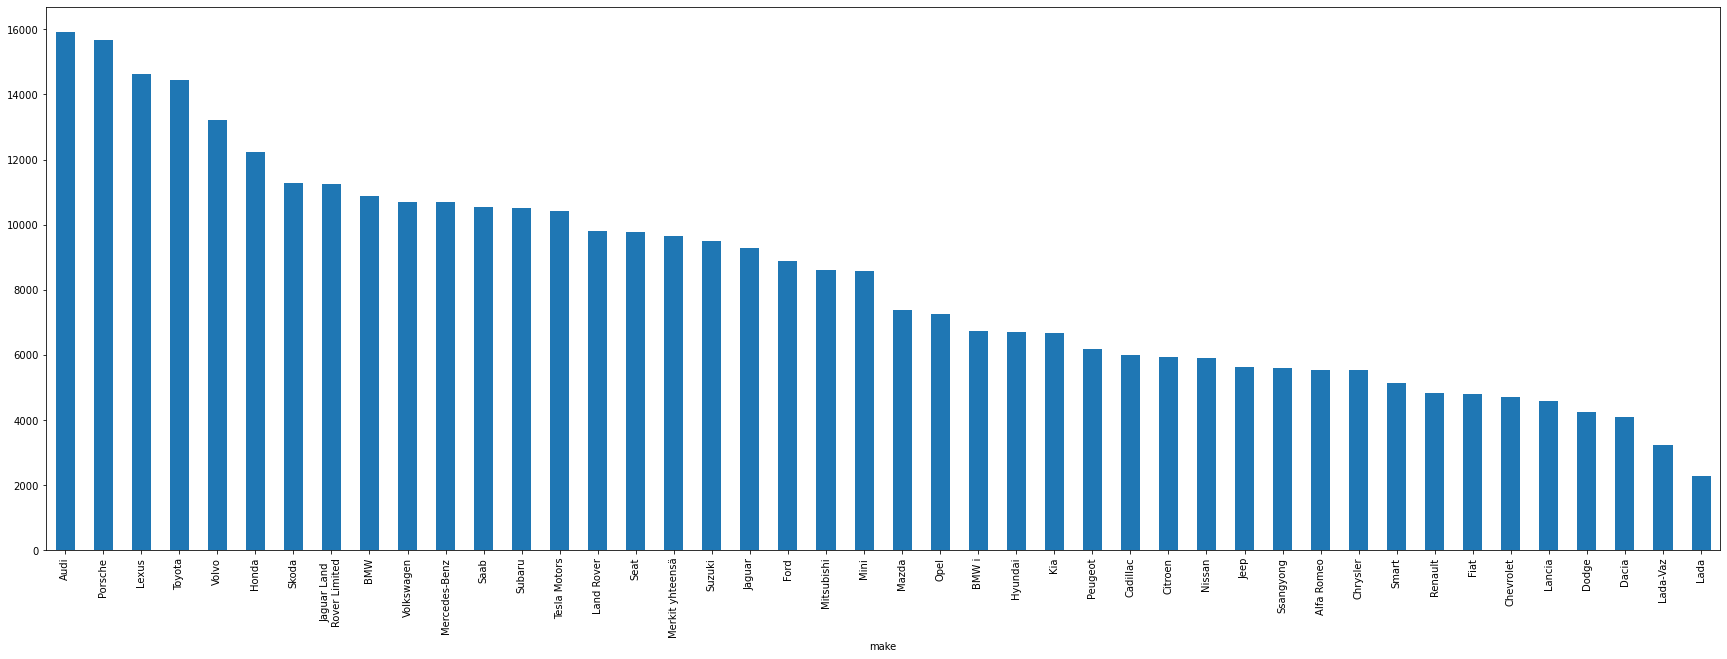

In [109]:
analysis1_mean_make['leif_score'].sort_values(ascending=False).plot(kind='bar', figsize=(30, 10))
